In [1]:
import numpy as np
import pandas as pd

# Question 1 to 6 FIRM 1 based



In [15]:
df_1=pd.read_excel('HW1.xlsx',
                 sheet_name='Firm 1')#,index_col='Week')
df_1.columns=[i.lower().replace(' ','_') for i in df_1.columns]
df_1.set_index('week',inplace=True)

col_tbu=[i for i in df_1.columns if 'sales' in i]


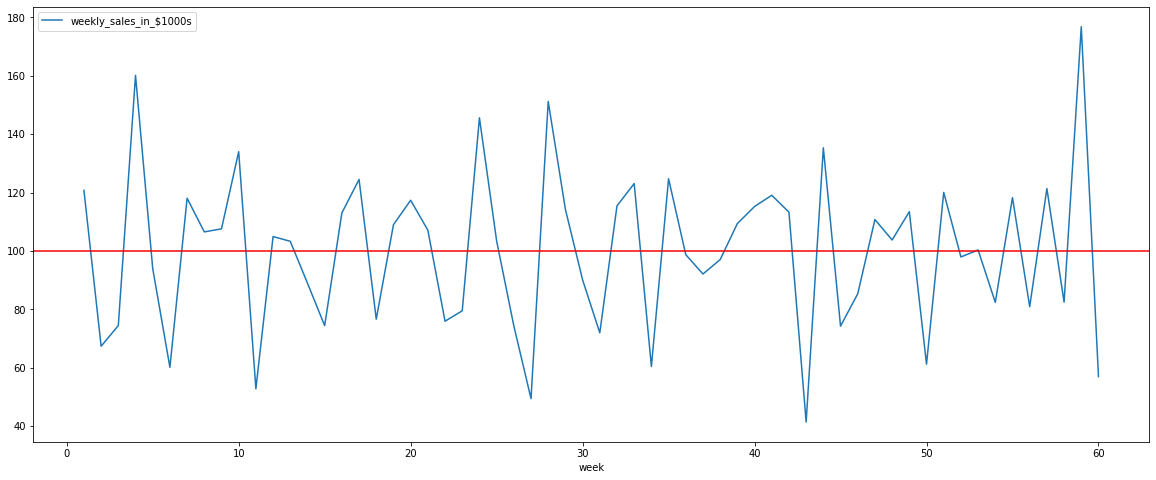

In [14]:
import matplotlib.pyplot as plt
df_1.plot(figsize=(20,8))
plt.axhline(df_1.mean().values,color='r')


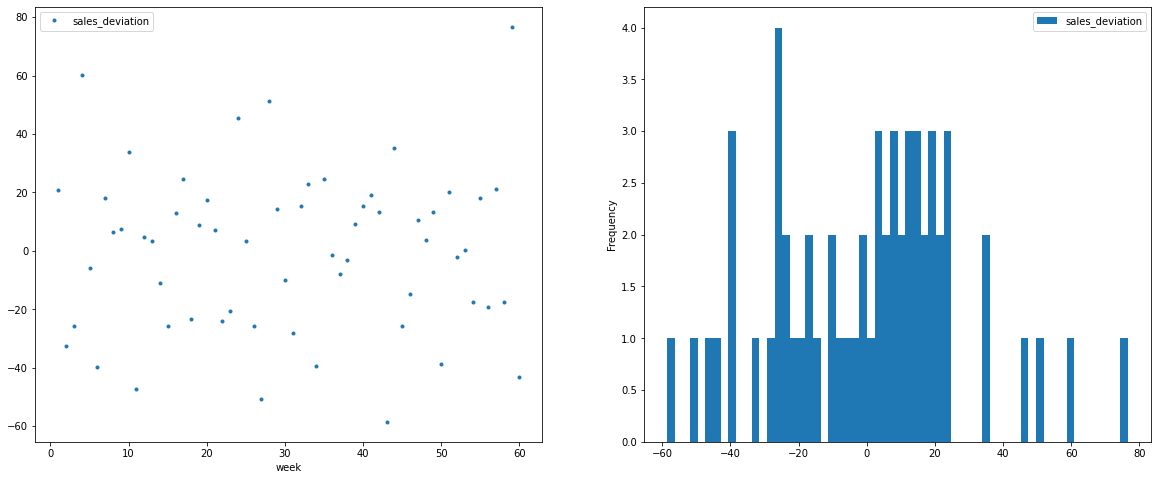

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_1.loc[:,'sales_deviation']=df_1[col_tbu]-df_1[col_tbu].mean()
df_1[['sales_deviation']].plot(style='.',ax=ax[0])
df_1[['sales_deviation']].plot(kind='hist',ax=ax[1],bins=60)

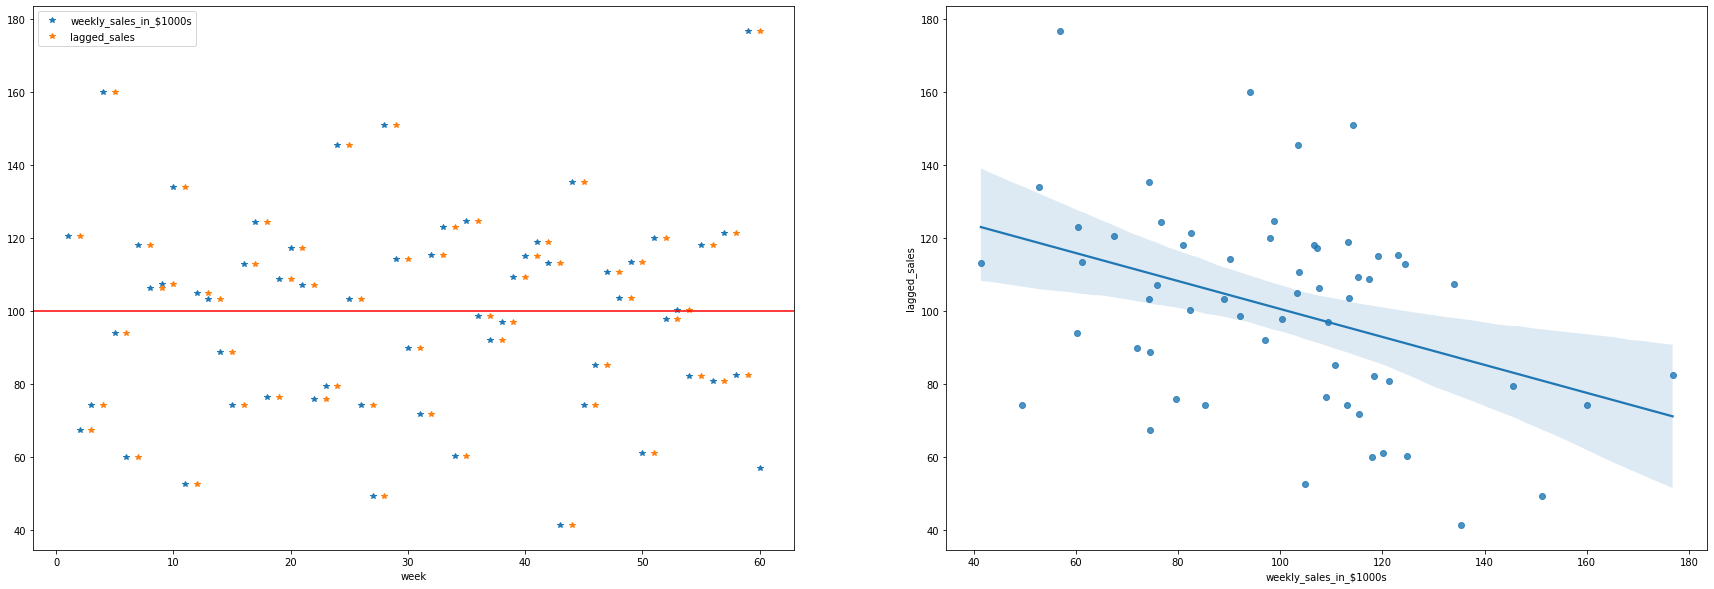

In [48]:
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(20,8))

df_1.loc[:,'lagged_sales']=df_1[col_tbu].shift(1)
df_1[col_tbu+['lagged_sales']].plot(style='*',figsize=(30,10),ax=ax[0])
ax[0].axhline(df_1[col_tbu].mean().values,color='r')

# df_1.plot(x='weekly_sales_in_$1000s',y='lagged_sales',kind='scatter',ax=ax[1])


sns.regplot(data=df_1,
            x='weekly_sales_in_$1000s',y='lagged_sales',
            ax=ax[1])#,kind='scatter',ax=ax[1])


In [49]:
df_1[col_tbu+['lagged_sales']].corr()

,weekly_sales_in_$1000s,lagged_sales
weekly_sales_in_$1000s,1.000000,-0.389398
lagged_sales,-0.389398,1.000000


In [51]:
df_1.mean().round()

weekly_sales_in_$1000s    100.0
sales_deviation             0.0
lagged_sales              101.0
dtype: float64

In [92]:
import statistics as st
st.pvariance(df_1[col_tbu].values.reshape(-1,)),df_1[col_tbu].var(),np.var(df_1[col_tbu].values.reshape(-1,))#pstdev can be used when u think you have the entire population dataset

st.stdev(df_1[col_tbu].values.reshape(-1,)),pow((df_1[col_tbu].var()*60)/59,1/2),np.std(df_1[col_tbu].values.reshape(-1,))

pow(df_1['sales_deviation'].var(),1/2),st.stdev(df_1[col_tbu].values.reshape(-1,))
df_1[col_tbu].mean()-(pow(df_1['sales_deviation'].var(),1/2)*2), df_1[col_tbu].mean()+(pow(df_1['sales_deviation'].var(),1/2)*2)


100 - (2*st.stdev(df_1[col_tbu].values.reshape(-1,))/pow(60,1/2)),100 + (2*st.stdev(df_1[col_tbu].values.reshape(-1,))/pow(60,1/2))

(92.87439184525608, 107.12560815474392)

# DATA 2 Question 7 to 9

In [93]:
df_2=pd.read_excel('HW1.xlsx',
                 sheet_name='Firm 2')#,index_col='Week')
df_2.columns=[i.lower().replace(' ','_') for i in df_2.columns]
df_2.set_index('week',inplace=True)

col_tbu=[i for i in df_2.columns if 'sales' in i]


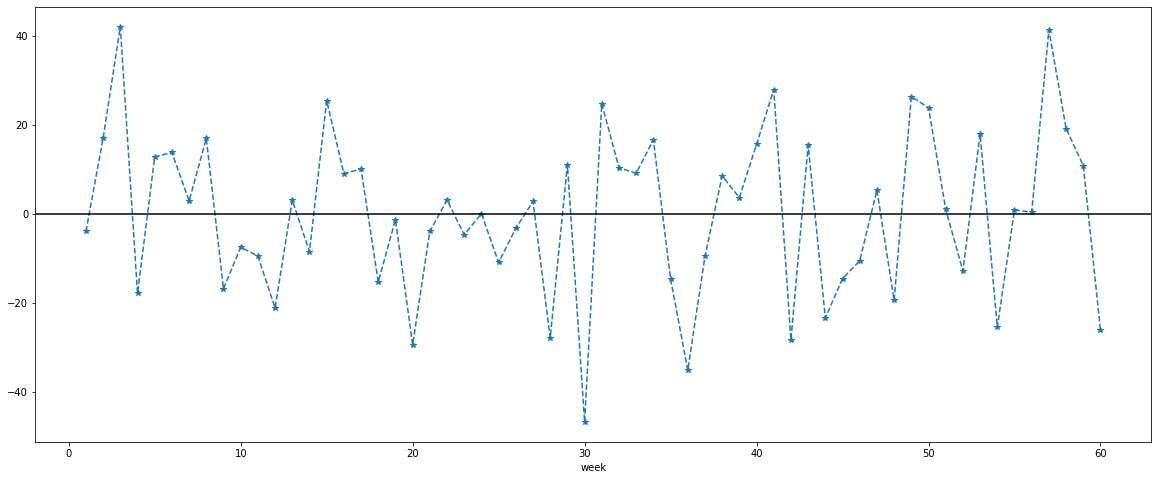

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(df_2.index.values.reshape(-1,1),df_2['weekly_sales_in_$1000s'])
y_pred=lr.predict(df_2.index.values.reshape(-1,1))


residual=df_2['weekly_sales_in_$1000s']-y_pred
residual.plot(figsize=(20,8),style='--*')
plt.axhline(0,color='black')#.values)

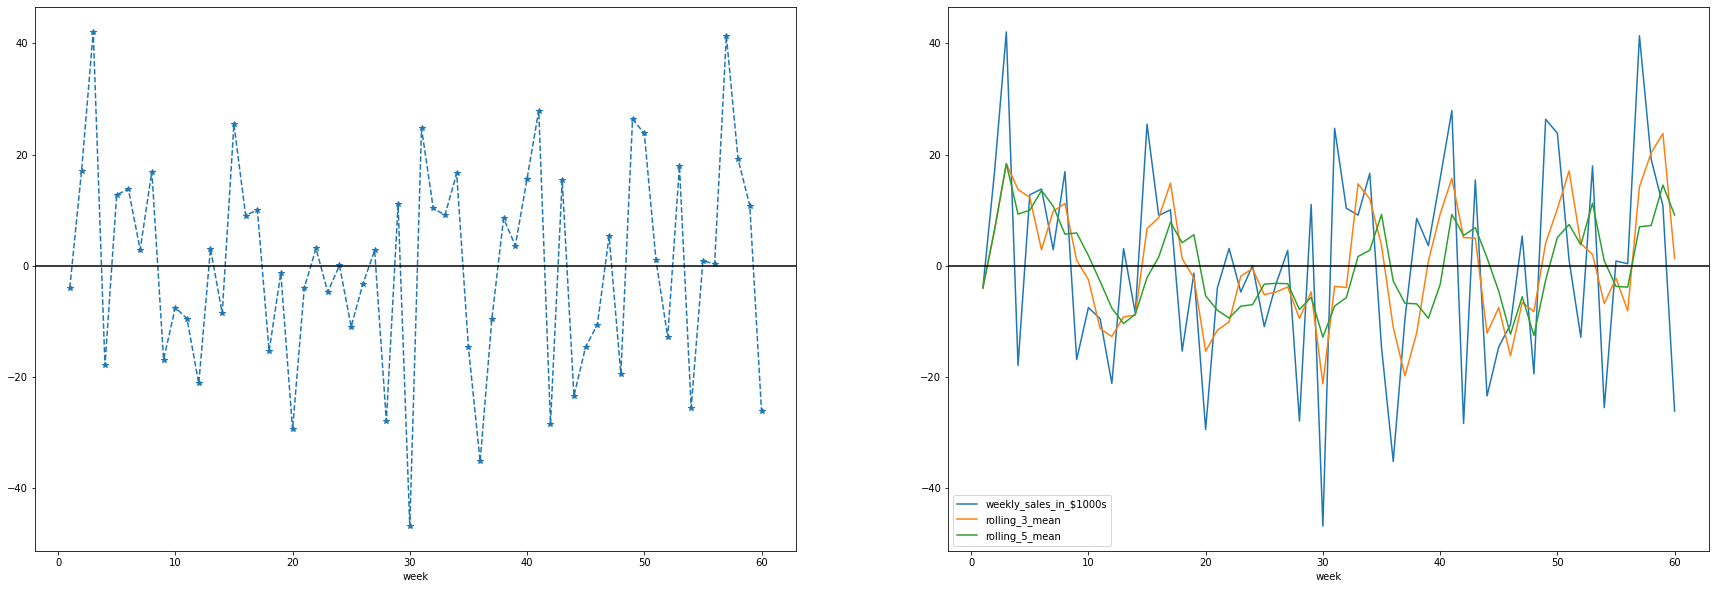

In [126]:
f,ax=plt.subplots(1,2,figsize=(30,10))
residual.plot(style='--*',ax=ax[0])
ax[0].axhline(0,color='black')#.values)


pd.concat([residual,
           residual.rolling(3,min_periods=1).mean().to_frame('rolling_3_mean'),
           residual.rolling(5,min_periods=1).mean().to_frame('rolling_5_mean'),
          #  residual.rolling(10,min_periods=1).mean().to_frame('rolling_10_mean')
           ],axis=1).plot(ax=ax[1])

ax[1].axhline(0,color='black')#.values)



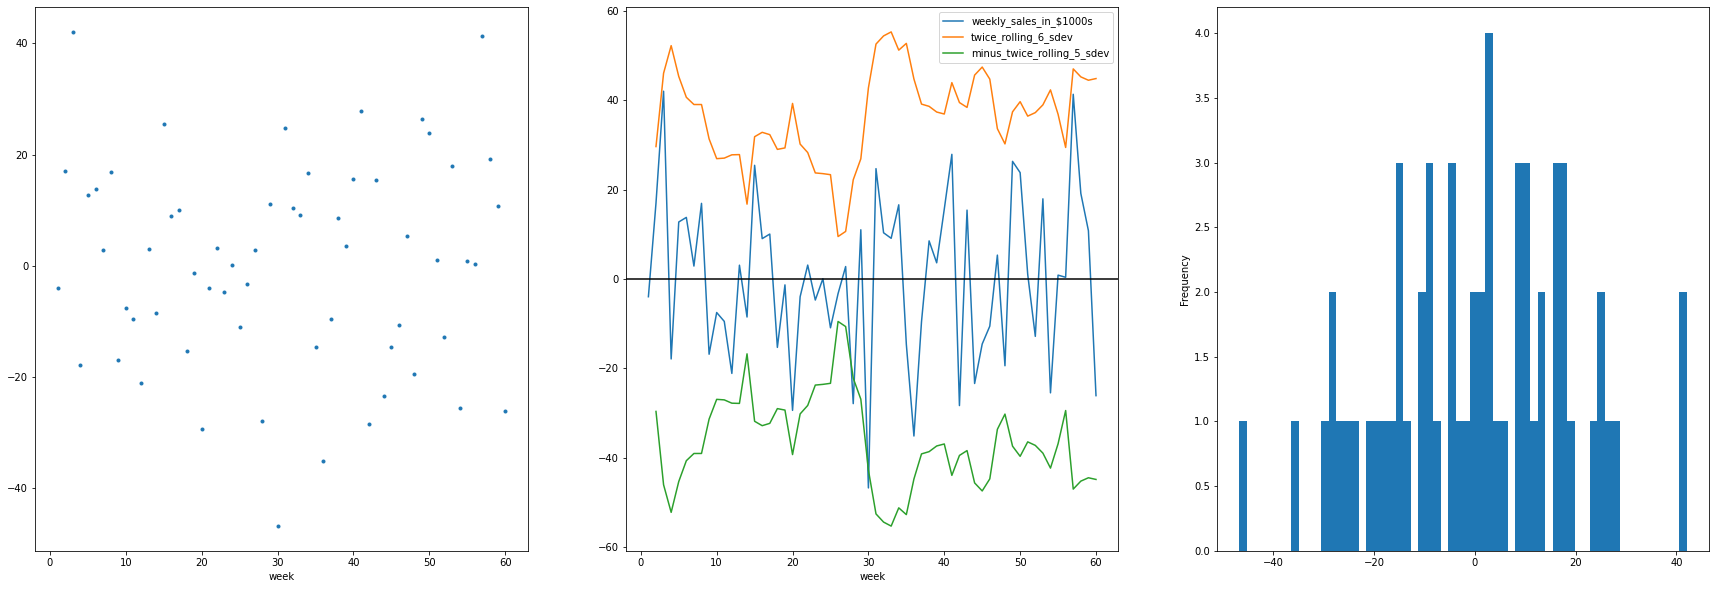

In [132]:
f,ax=plt.subplots(1,3,figsize=(30,10))
residual.plot(style='.',ax=ax[0])
# ax[0].axhline(0,color='black')#.values)


pd.concat([residual,
          #  2*pow(residual.rolling(3,min_periods=1).var(),1/2).to_frame('twice_rolling_3_sdev'),
           2*pow(residual.rolling(6,min_periods=1).var(),1/2).to_frame('twice_rolling_6_sdev'),
           -2*pow(residual.rolling(6,min_periods=1).var(),1/2).to_frame('minus_twice_rolling_5_sdev'),
           ],axis=1).plot(ax=ax[1])

ax[1].axhline(0,color='black')#.values)

residual.plot(kind='hist',bins=60)


In [138]:
temp_df=pd.concat([residual.to_frame('residual'),
           residual.shift(1).to_frame('lagged_residual')
          ],axis=1)
temp_df.corr()

# #1 quarter 4*3 weeks =12
# temp_df=pd.concat([residual.to_frame('residual'),
#            residual.shift(12).to_frame('lagged_residual')
#           ],axis=1)
# temp_df.corr()


,residual,lagged_residual
residual,1.000000,0.192856
lagged_residual,0.192856,1.000000


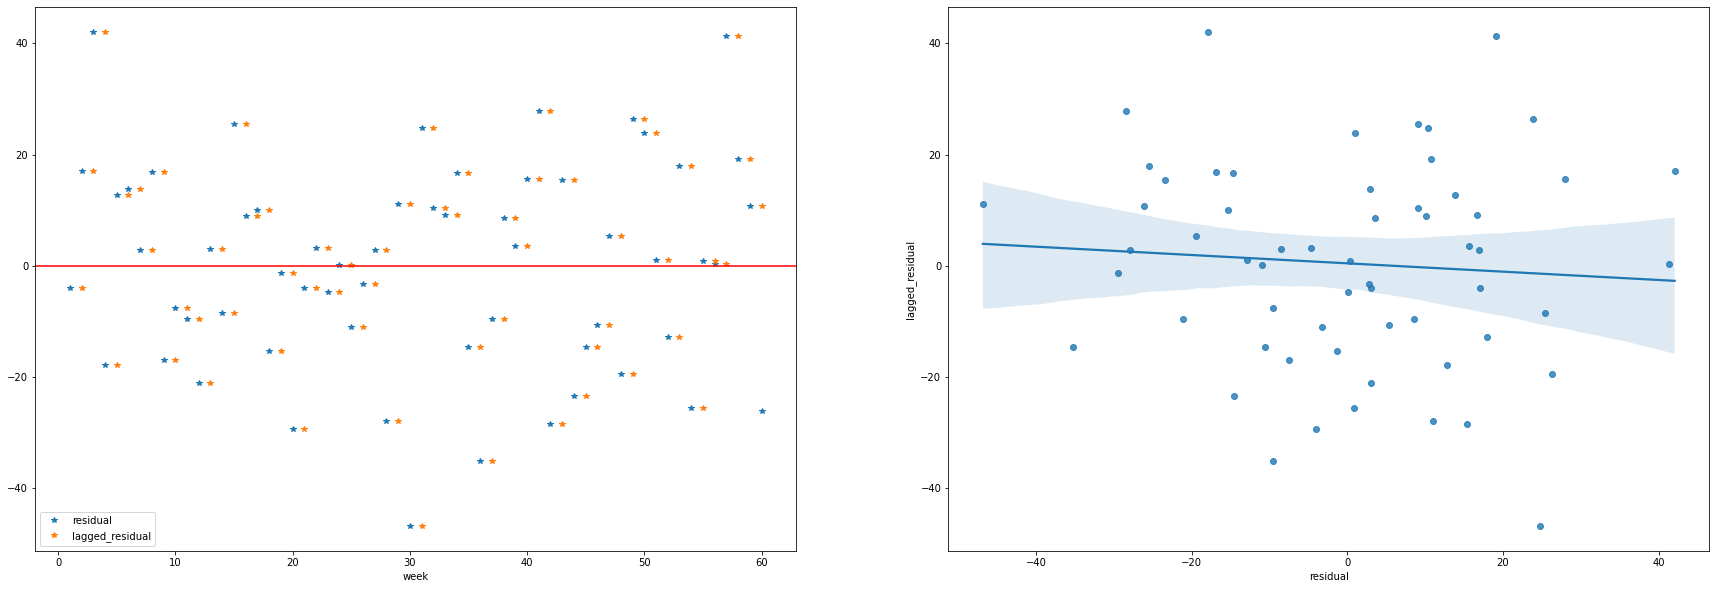

In [137]:
f,ax=plt.subplots(1,2,figsize=(20,8))

temp_df.plot(style='*',figsize=(30,10),ax=ax[0])
ax[0].axhline(0,color='r')

# df_1.plot(x='weekly_sales_in_$1000s',y='lagged_sales',kind='scatter',ax=ax[1])


sns.regplot(data=temp_df,
            x='residual',y='lagged_residual',
            ax=ax[1])#,kind='scatter',ax=ax[1])


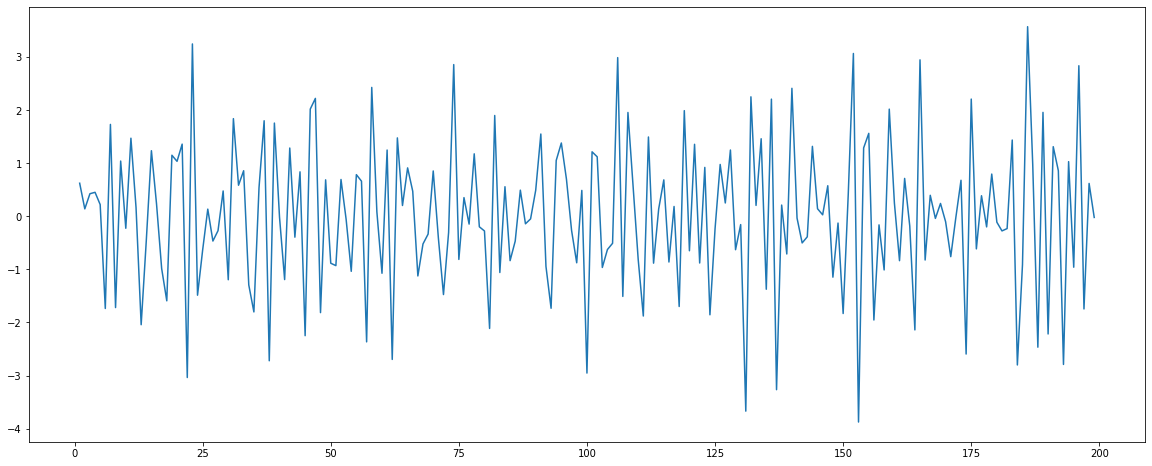

In [148]:
import numpy.random as npr

# plt.plot(npr.normal(size=20))

df=pd.DataFrame({'random':npr.normal(size=200)})#.plot()
df.loc[:,'lagged_random']=df['random'].shift(1)
df.loc[:,'diff_lagged']=df['random'].diff(1)

df['diff_lagged'].plot(figsize=(20,8))

In [150]:
pd.DataFrame(
    {
        'a':[1]*100,
      'b':[1]*100
    }
).cov()

,a,b
a,0.0,0.0
b,0.0,0.0


# LEARNING from the ipynb file

In [79]:
pow(np.sum(np.power(df_1['sales_deviation'],2))/59,1/2),st.stdev(df_1[col_tbu].values.reshape(-1,)),np.std(df_1[col_tbu].values.reshape(-1,)),pow(df_1['sales_deviation'].var(),1/2)
#Learning thet the numpy var always gives with population standard deviation considering all the data points thus is a biased estimate 

(27.597361714922954,
 27.597361714922954,
 27.366417389394556,
 27.597361714922954)

# References

In [74]:
# https://stackoverflow.com/questions/14178194/python-pandas-plotting-options-for-multiple-lines

# https://stackoverflow.com/questions/44863375/how-to-change-spacing-between-ticks-in-matplotlib


data = np.array([0.0, 0.25, 0.25, 1.25, 1.5, 1.75, 2.75, 3.25])
# pow(
np.sum(np.power(data-np.mean(data),2))/8
    # ,1/2)


1.25